# 05 图像分割/二值化

## 简介 
该部分的学习内容是对经典的阈值分割算法进行回顾，图像阈值化分割是一种传统的最常用的图像分割方法，因其实现简单、计算量小、性能较稳定而成为图像分割中最基本和应用最广泛的分割技术。它特别适用于目标和背景占据不同灰度级范围的图像。它不仅可以极大的压缩数据量，而且也大大简化了分析和处理步骤，因此在很多情况下，是进行图像分析、特征提取与模式识别之前的必要的图像预处理过程。图像阈值化的目的是要按照灰度级，对像素集合进行一个划分，得到的每个子集形成一个与现实景物相对应的区域，各个区域内部具有一致的属性，而相邻区域不具有这种一致属性。这样的划分可以通过从灰度级出发选取一个或多个阈值来实现。

## 算法理论介绍
### 最大类间方差法（大津阈值法） 
大津法（OTSU）是一种确定图像二值化分割阈值的算法，由日本学者大津于1979年提出。从大津法的原理上来讲，该方法又称作最大类间方差法，因为按照大津法求得的阈值进行图像二值化分割后，前景与背景图像的类间方差最大。

它被认为是图像分割中阈值选取的最佳算法，计算简单，不受图像亮度和对比度的影响，因此在数字图像处理上得到了广泛的应用。它是按图像的灰度特性，将图像分成背景和前景两部分。因方差是灰度分布均匀性的一种度量,背景和前景之间的类间方差越大,说明构成图像的两部分的差别越大,当部分前景错分为背景或部分背景错分为前景都会导致两部分差别变小。因此,使类间方差最大的分割意味着错分概率最小。

**应用：** 是求图像全局阈值的最佳方法，应用不言而喻，适用于大部分需要求图像全局阈值的场合。

**优点：** 计算简单快速，不受图像亮度和对比度的影响。

**缺点：** 对图像噪声敏感；只能针对单一目标分割；当目标和背景大小比例悬殊、类间方差函数可能呈现双峰或者多峰，这个时候效果不好。

原理非常简单，涉及的知识点就是均值、方差等概念和一些公式推导。为了便于理解，我们从目的入手，反推一下这著名的OTSU算法。

求类间方差：

OTSU算法的假设是存在阈值TH将图像所有像素分为两类C1(小于TH)和C2(大于TH)，则这两类像素各自的均值就为m1、m2，图像全局均值为mG。同时像素被分为C1和C2类的概率分别为p1、p2。因此就有：

![](imgs/20200412211054156.png)         

根据原文，式（4）还可以进一步变形：

![](imgs/20200412210949765.png)

分割：

这个分割就是二值化，OpenCV给了以下几种方式，很简单，可以参考：

![](imgs/20200412211203976.png)

### 自适应阈值
前面介绍了OTSU算法，但这算法属于全局阈值法，所以对于某些光照不均的图像，这种全局阈值分割的方法会显得苍白无力，如下图：

![](imgs/20200412211750915.png)

显然，这样的阈值处理结果不是我们想要的，那么就需要一种方法来应对这样的情况。

这种办法就是自适应阈值法(adaptiveThreshold)，它的思想不是计算全局图像的阈值，而是根据图像不同区域亮度分布，计算其局部阈值，所以对于图像不同区域，能够自适应计算不同的阈值，因此被称为自适应阈值法。(其实就是局部阈值法)

如何确定局部阈值呢？可以计算某个邻域(局部)的均值、中值、高斯加权平均(高斯滤波)来确定阈值。值得说明的是：如果用局部的均值作为局部的阈值，就是常说的移动平均法。


## 基于OpenCV的实现

#### 1.简单阀值
cv2.threshold , cv2.adaptiveThreshold  
当像素值高于阀值时，我们给这个像素赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）。这个函数就是cv2.threshold()。这个函数的第一个参数就是原图像，原图像应该是灰度图。第二个参数就是用来对像素值进行分类的阀值，第三个参数就是当像素值高于（或者小于）阀值时，应该被赋予新的像素值。OpenCV提供了多种不同的阀值方法，这是有第四个参数来决定的。方法包括：
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV
![](imgs/pic523.jpg)
上图摘选自《学习 OpenCV》中文版，其实这些在文档中都有详细介绍了，你也可以直接查看文档。
这个函数有两个返回值，第一个为retVal，后面会解释，第二个就是阀值化之后的结果图像了。

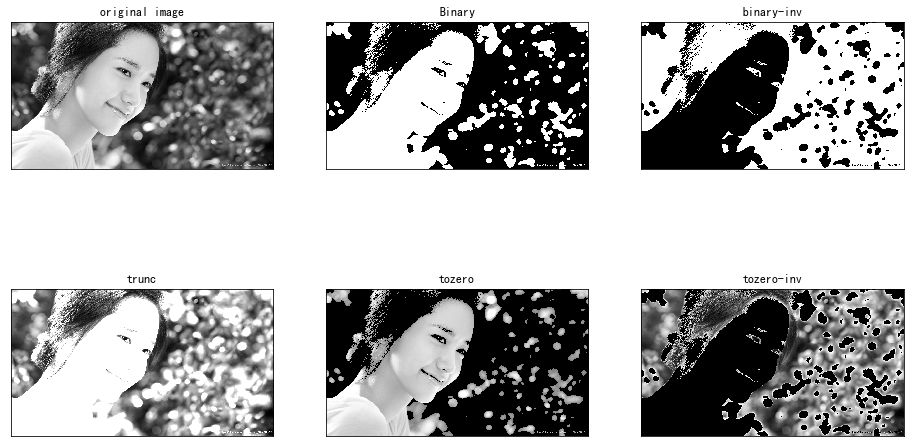

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/yun.jpg',0)
ret , thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret , thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret , thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret , thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['original image','Binary','binary-inv','trunc','tozero','tozero-inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]
plt.figure(figsize=(16, 9))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### 2.自适应阀值
根据图像上的每一个小区域计算与其对应的阀值。因此在同一幅图像上的不同区域采用的是不同的阀值，从而使我们能在亮度不同的情况下得到更好的结果。

这种方法需要我们指定三个参数，返回值只有一个。

Adaptive Method 指定计算阀值的方法
* cv2.ADAPTIVE_THRESH_MEAN_C:阀值取自相邻区域的平均值
* cv2.ADAPTIVE_THRESH_GAUSSIAN_C:阀值取自相邻区域的加权和，权重为一个高斯窗口
* Block Size 邻域大小（用来计算阀值的区域大小）

C这就是一个常数，阀值就等于的平均值或者加权平均值减去这个常数

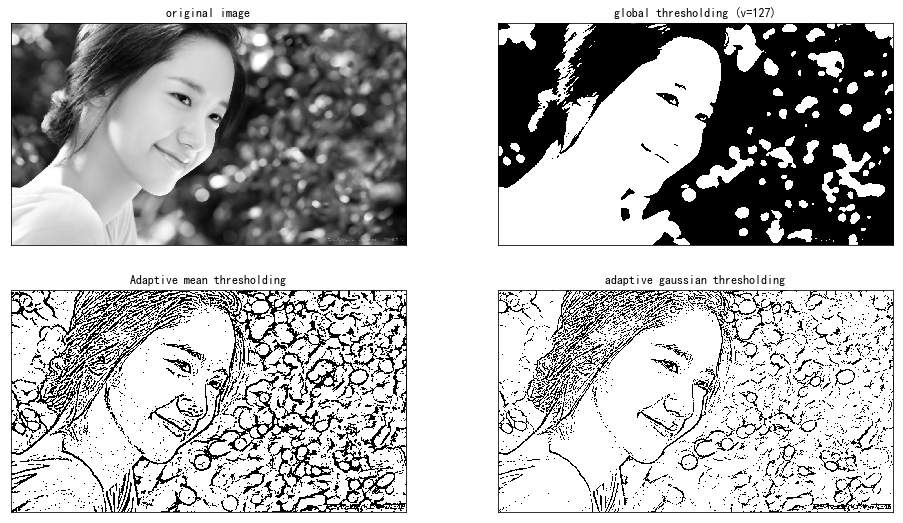

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/yun.jpg',0)
#中值滤波
img = cv2.medianBlur(img,5)

ret , th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# 11为block size，2为C值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2 )
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,11,2)

titles = ['original image' , 'global thresholding (v=127)','Adaptive mean thresholding',
          'adaptive gaussian thresholding']
images = [img,th1,th2,th3]
plt.figure(figsize=(16, 9))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### 3.Otsu's二值化
我们前面说到，cv2.threshold函数是有两个返回值的，前面一直用的第二个返回值，也就是阈值处理后的图像，那么第一个返回值（得到图像的阈值）将会在这里用到。

前面对于阈值的处理上，我们选择的阈值都是127，那么实际情况下，怎么去选择这个127呢？有的图像可能阈值不是127得到的效果更好。那么这里我们需要算法自己去寻找到一个阈值，而Otsu’s就可以自己找到一个认为最好的阈值。并且Otsu’s非常适合于图像灰度直方图具有双峰的情况，他会在双峰之间找到一个值作为阈值，对于非双峰图像，可能并不是很好用。那么经过Otsu’s得到的那个阈值就是函数cv2.threshold的第一个参数了。因为Otsu’s方法会产生一个阈值，那么函数cv2.threshold的的第二个参数（设置阈值）就是0了，并且在cv2.threshold的方法参数中还得加上语句cv2.THRESH_OTSU。

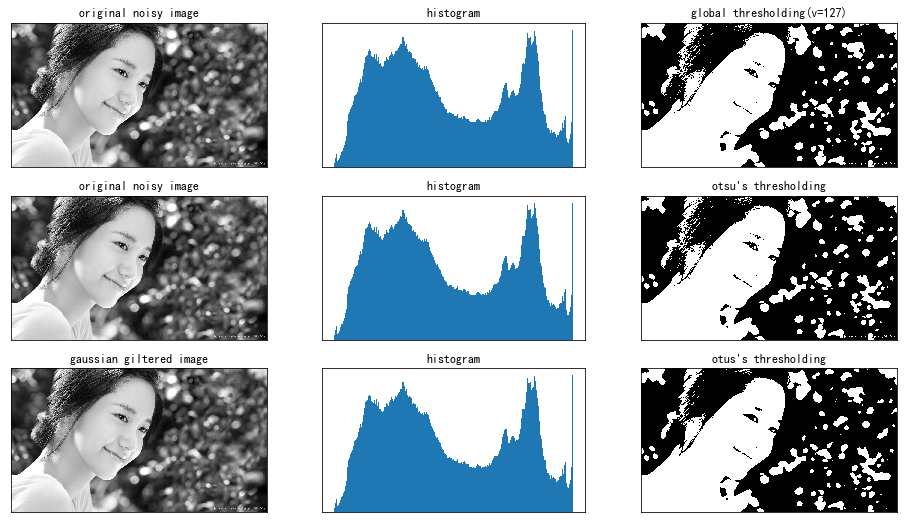

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/yun.jpg',0)

ret1,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

ret2,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#(5,5)为高斯核的大小，0为标准差
blur= cv2.GaussianBlur(img,(5,5),0)

#阀值一定要设为0
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images=[img,0,th1,
         img,0,th2,
         img,0,th3]
titles =['original noisy image','histogram','global thresholding(v=127)',
          'original noisy image','histogram',"otsu's thresholding",
          'gaussian giltered image','histogram',"otus's thresholding"]
#这里使用了pyplot中画直方图的方法，plt.hist要注意的是他的参数是一维数组
#所以这里使用了（numpy）ravel方法，将多维数组转换成一维，也可以使用flatten方法
plt.figure(figsize=(16, 9))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
    
plt.show() 